# Image Noise and Gaussian Blur

Image noise manifests itself as random variations in the brightness or color of pixels in an image, or speckles that are similar to film grain on analogue cameras. If image noise is significant enough, it can potentially interfere with a computer vision system’s functionality, such as the edge-detection algorithm for lane detection in a self-driving car. At the very least, image noise reduction is used to improve the quality of an image.

There are many methods of reducing image noise, such as median blurring and bilateral filtering, but first we will focus on Gaussian blurring.

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

figsize = (10, 10)

## Camera does not capture the beauty of the puppy as our eyes

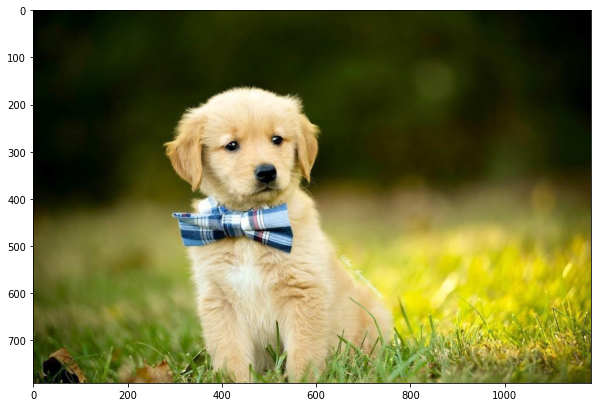

In [2]:
img = cv2.imread('puppy.jpg')
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.figure(figsize=figsize)
plt.imshow(img)

## And often the puppy image was contaminated with random noises 

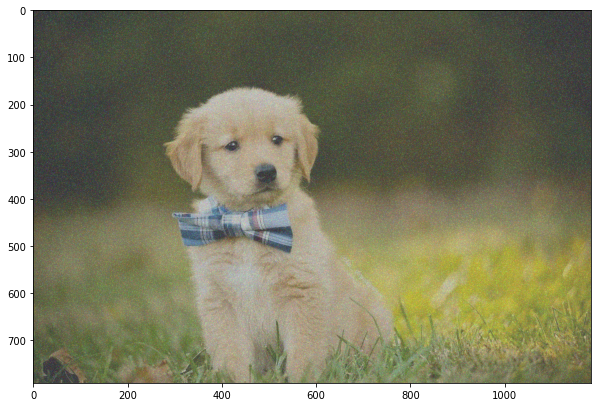

In [3]:
dst = np.empty_like(img) #create empty array the size of the image
noise = cv2.randn(dst, (0,0,0), (60,60,60)) #add random img noise

# Pass img through noise filter to add noise
pup_noise = cv2.addWeighted(img, 0.5, noise, 0.5, 50) 

plt.figure(figsize=figsize)
plt.imshow(pup_noise)

## Gaussian Blurring

In essence, the Gaussian blurring algorithm will scan over each pixel of the image, and recalculate the pixel value based on the pixel values that surround it. The area that is scanned around each pixel is called the kernel. A larger kernel scans a larger amount of pixels that surround the center pixel.

Gaussian blurring doesn’t weigh each pixel equally, however. The closer a pixel is to the center, the greater it affects the weighted average used to calculate the new center pixel value. The image below demonstrates this function. This method assumes pixels closest to the center pixel will be closest to the true value of that pixel, so they will influence the averaged value of the center pixel greater than pixels further away.

The size of the sigma of the function dictates how wide the curve should be inside the kernel, in the same way that that sigma, or standard deviation, of a Normal Distribution curve will dictate the width of the curve. Since we are essentially operating in 3-D space here, the sigma here works both in the X and Y directions, so sigma-X and sigma-Y may have different values.

![gaussian_sigma](gaussian_sigma.jpg)



The openCV GaussianBlur() function takes in 3 parameters here: the original image, the kernel size, and the sigma for X and Y. The kernel is the matrix that the algorithm uses to scan over the image, and in this case the kernel is 5x5, where the center pixel is the pixel that will be changed with respect to the surrounding 24. The sigma dictates the width of the curve in the X and Y directions. If one value is provided to the function, it will serve as sigma for both X and Y, but separate values may be passed as well (resulting in 4 arguments). It is also important to note that if the sigma is 0, it will be auto-calculated from the kernel size.

## <font color='red'>Homework: GaussianBlur to Reduce Noises </font>
Try kernel size from 3, 5, ..., 31 
* If kernel size is too small, there stil exist image noises 
* If kernel size is too big, the image will get too blur and lose fidelity 

Question: 
1. Why the kernel size is always odd? 
   <br><font color='red'> Answer:  </font>
2. At which kernel size, the noise will go away without lose fidelity of the image ?
   <br><font color='red'> Answer:  </font>

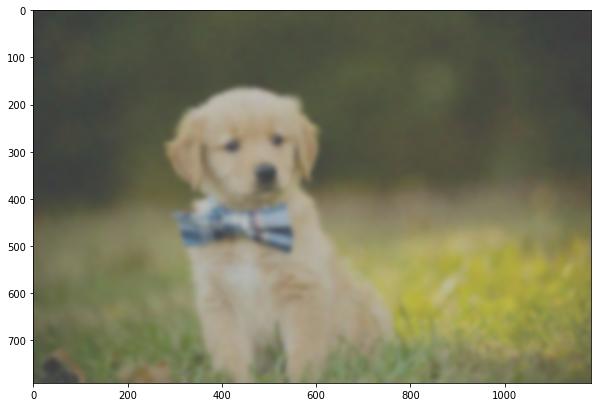

In [4]:
# Blurring function; kernel=3, sigma=auto
pup_blur = cv2.GaussianBlur(pup_noise, (31, 31), 0)

plt.figure(figsize=figsize)
plt.imshow(pup_blur)

## BILATERAL FILTER

Gaussian filter performs a blurring operation that considers only nearby pixels for the averaging. Bilateral filter does this too. However, in addition to this, it considers the intensity of pixels as well i.e. it does not consider pixel intensities too much different from the central pixel of the kernel. 

Since, there is a large change of intensity when it comes to any edge in an image, bilateral filter does not consider these edge pixels in the averaging (since their intensities are different than neighbouring pixels). This is why bilateral filter can preserve edges while blurring the rest of the image.

Function parameters: 

cv2.bilateralFilter(img, d, sigma_colour, sigma_space)

Let's go through the parameters one by one -
* img - The image that is loaded
* d - Diameter of the pixel neighborhood to consider while blurring. Since, this filter is slower than other filters, it is recommended to keep d = 5 for real-time applications.
* sigma_colour - This is the value of sigma in the colour space (RGB, HSV, and so on). Higher the value of this parameter, colours farther apart in the colour space are considered for the filtering provided they lie within the range of sigma_space.                                                               Color space - Wikipedia
* sigma_space - This is the value of sigma in the co-ordinate space. Higher this value, pixels farther apart in the co-ordinate space are considered for the filtering provided their colours are within the sigma_colour range.

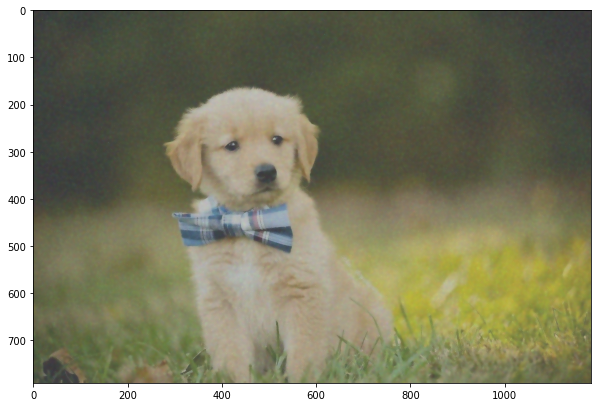

In [5]:
# You can adjust below parameters to evalauate the results
bilateralFiltered = cv2.bilateralFilter(pup_noise,9,75,75)
plt.figure(figsize=figsize)
plt.imshow(bilateralFiltered)

## <font color='red'>Optional Homework: Bilateral filter to Preserve Edges while reducing Noises</font>
Question: 
*. What're the best parameters so that the noise will go away without lose fidelity of the image ?
   <br><font color='red'> Answer:  </font>